In [1]:
#import data analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate the folder name with current date and time
#folder_name = 'results/task_match_0603_2238/'
folder_name = 'results/task_match_0803_1532'

In [3]:
#open json file as dataframe
df = pd.read_json(folder_name + "/sys_prompt1.json").dropna()
df

,title,ref_task,ind,gen_task,score,matrix,ref_order,gen_order
0,Lodging Managers,[Answer inquiries pertaining to hotel policies...,11,[Oversee daily operations of hotel staff and d...,0.506096,"[[0.7160055637, 0.5102865696000001, 0.49521067...","[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[11, 1, 14, 16, 2, 3, 18, 13, 6, 15, 9, 5, 4, ..."
1,Nanosystems Engineers,[Provide scientific or technical guidance or e...,17,"[Design nanoscale devices, Develop materials w...",0.579940,"[[0.375482142, 0.2953431904, 0.3431423008, 0.3...","[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[6, 7, 2, 5, 12, 14, 9, 8, 15, 11, 10, 4, 13, ..."
2,Conservation Scientists,[Apply principles of specialized fields of sci...,19,"[Monitoring wildlife populations, Conducting r...",0.491694,"[[0.3371816874, 0.5201646090000001, 0.65123611...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[24, 2, 21, 7, 25, 13, 3, 19, 17, 12, 16, 27, ..."
3,Farm and Home Management Educators,[Advise farmers and demonstrate techniques in ...,25,[Developing educational programs for farmers a...,0.486222,"[[0.6298267841, 0.5968769193, 0.4857193232, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[5, 8, 11, 10, 4, 3, 1, 2, 7, 9, 6, 0]"
4,Medical and Clinical Laboratory Technicians,"[Conduct chemical analyses of body fluids, suc...",29,"[Perform blood tests, Conduct DNA analysis, Ex...",0.542772,"[[0.5053529739, 0.5535107255, 0.63985103370000...","[0, 1, 2, 3, 4, 5]","[2, 4, 3, 1, 0, 5]"
5,"Office Clerks, General","[Operate office machines, such as photocopiers...",43,"[file organization, data entry, office supplie...",0.437339,"[[0.0751385391, 0.3463429213, 0.4340895712, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[8, 4, 11, 1, 0, 6, 7, 9, 3, 5, 2, 10]"
6,Elevator and Escalator Installers and Repairers,"[Inspect wiring connections, control panel hoo...",47,[Install new elevators and escalators in build...,0.484159,"[[0.2610115409, 0.3832697868, 0.567276895, 0.4...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[9, 12, 1, 13, 14, 6, 15, 7, 3, 4, 8, 10, 2, 1..."
7,"Model Makers, Metal and Plastic","[Study blueprints, drawings, and sketches to d...",51,"[Create detailed metal prototypes, Design plas...",0.474785,"[[0.4137884378, 0.4837269187, 0.40668565030000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[13, 9, 8, 4, 2, 12, 5, 3, 10, 0, 11, 1, 6, 7]"


In [57]:
#get jobzone df
jz = pd.read_excel('datasets/job_zone.xlsx')
jz.columns = jz.columns.str.lower().str.replace(" ","_")
jz = jz.drop(labels=['date', 'domain_source'], axis=1)   
jz = jz.rename(columns={'o*net-soc_code':'code', 'job_zone':'zone'})

#merge the two dataframes on title
df = pd.merge(df, jz, on='title', how='left')
df

,title,ref_task,ind,gen_task,score,matrix,ref_order,gen_order,code,zone
0,Lodging Managers,[Answer inquiries pertaining to hotel policies...,11,[Oversee daily operations of hotel staff and d...,0.506096,"[[0.7160055637, 0.5102865696000001, 0.49521067...","[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[11, 1, 14, 16, 2, 3, 18, 13, 6, 15, 9, 5, 4, ...",11-9081.00,4
1,Nanosystems Engineers,[Provide scientific or technical guidance or e...,17,"[Design nanoscale devices, Develop materials w...",0.579940,"[[0.375482142, 0.2953431904, 0.3431423008, 0.3...","[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[6, 7, 2, 5, 12, 14, 9, 8, 15, 11, 10, 4, 13, ...",17-2199.09,5
2,Conservation Scientists,[Apply principles of specialized fields of sci...,19,"[Monitoring wildlife populations, Conducting r...",0.491694,"[[0.3371816874, 0.5201646090000001, 0.65123611...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[24, 2, 21, 7, 25, 13, 3, 19, 17, 12, 16, 27, ...",19-1031.00,4
3,Farm and Home Management Educators,[Advise farmers and demonstrate techniques in ...,25,[Developing educational programs for farmers a...,0.486222,"[[0.6298267841, 0.5968769193, 0.4857193232, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[5, 8, 11, 10, 4, 3, 1, 2, 7, 9, 6, 0]",25-9021.00,5
4,Medical and Clinical Laboratory Technicians,"[Conduct chemical analyses of body fluids, suc...",29,"[Perform blood tests, Conduct DNA analysis, Ex...",0.542772,"[[0.5053529739, 0.5535107255, 0.63985103370000...","[0, 1, 2, 3, 4, 5]","[2, 4, 3, 1, 0, 5]",29-2012.00,3
5,"Office Clerks, General","[Operate office machines, such as photocopiers...",43,"[file organization, data entry, office supplie...",0.437339,"[[0.0751385391, 0.3463429213, 0.4340895712, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[8, 4, 11, 1, 0, 6, 7, 9, 3, 5, 2, 10]",43-9061.00,2
6,Elevator and Escalator Installers and Repairers,"[Inspect wiring connections, control panel hoo...",47,[Install new elevators and escalators in build...,0.484159,"[[0.2610115409, 0.3832697868, 0.567276895, 0.4...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[9, 12, 1, 13, 14, 6, 15, 7, 3, 4, 8, 10, 2, 1...",47-4021.00,3
7,"Model Makers, Metal and Plastic","[Study blueprints, drawings, and sketches to d...",51,"[Create detailed metal prototypes, Design plas...",0.474785,"[[0.4137884378, 0.4837269187, 0.40668565030000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]","[13, 9, 8, 4, 2, 12, 5, 3, 10, 0, 11, 1, 6, 7]",51-4061.00,3


Text(0.5, 1.0, 'mean similarity score by industry')

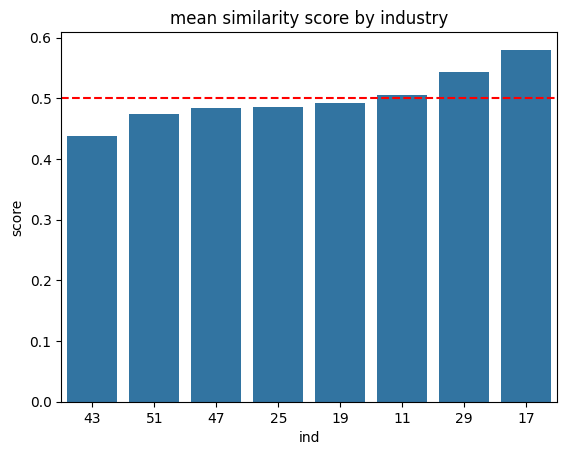

In [58]:
# get mean similarity score base on industry
mean_score = df.groupby("ind")["score"].mean()
#add a average line


#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
#add a average line
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')

plt.title("mean similarity score by industry")

Text(0.5, 1.0, 'mean similarity score by job zone')

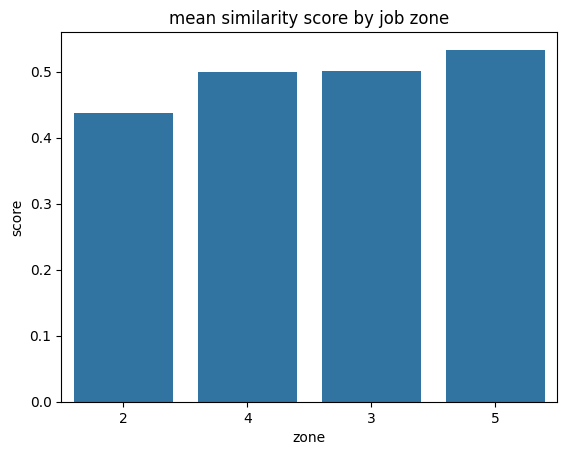

In [59]:
#plot similarity score by job zone
mean_score = df.groupby("zone")["score"].mean()
sns.barplot(mean_score, order=mean_score.sort_values().index)
plt.title("mean similarity score by job zone")

In [60]:
max_similarity = df[df["score"] == df["score"].max()]
max_similarity

,title,ref_task,ind,gen_task,score,matrix,ref_order,gen_order,code,zone
1,Nanosystems Engineers,[Provide scientific or technical guidance or e...,17,"[Design nanoscale devices, Develop materials w...",0.57994,"[[0.375482142, 0.2953431904, 0.3431423008, 0.3...","[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[6, 7, 2, 5, 12, 14, 9, 8, 15, 11, 10, 4, 13, ...",17-2199.09,5


Text(0.5, 1.0, 'similarity matrix of Nanosystems Engineers')

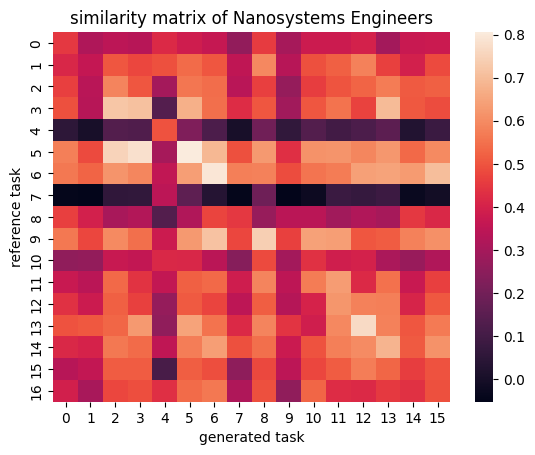

In [61]:
x = max_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [62]:
min_similarity = df[df["score"] == df["score"].min()]
min_similarity

,title,ref_task,ind,gen_task,score,matrix,ref_order,gen_order,code,zone
5,"Office Clerks, General","[Operate office machines, such as photocopiers...",43,"[file organization, data entry, office supplie...",0.437339,"[[0.0751385391, 0.3463429213, 0.4340895712, 0....","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[8, 4, 11, 1, 0, 6, 7, 9, 3, 5, 2, 10]",43-9061.00,2


Text(0.5, 1.0, 'similarity matrix of Office Clerks, General')

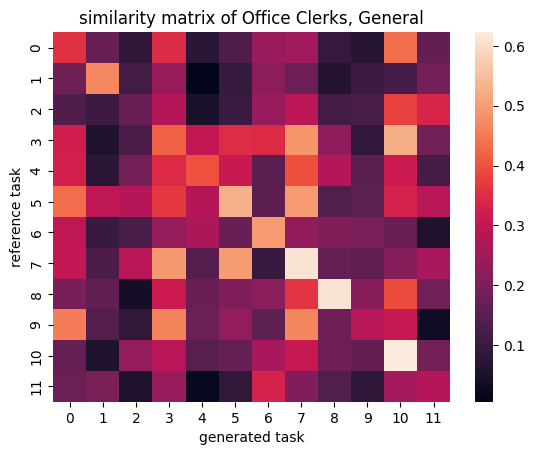

In [63]:
x = min_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [64]:
#create a df dropping the rows with matrix shape not equal to (x, x)
df_test = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
#define a function to rearrange matrix based on gen_order
def rearrange_matrix(matrix, order):
    return matrix[:, order]
#apply the function to the matrix column
df_test["rearranged_matrix"] = df_test.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)



C:\Users\godfr\AppData\Local\Temp\ipykernel_34192\730366682.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["rearranged_matrix"] = df_test.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)


In [65]:
# find the best rearranged matrix
def is_diagonally_dominant(rearranged_matrix):
    D = np.abs(np.diag(rearranged_matrix))
    S = np.sum(np.abs(rearranged_matrix), axis=1) - D
    return np.all(D >= S)

def calculate_score(rearranged_matrix):
    score = 0
    for i in range(np.shape(rearranged_matrix)[0]):
        max_off_diagonal = max(abs(rearranged_matrix[i][j]) for j in range(np.shape(rearranged_matrix)[1]) if j != i)
        score += abs(rearranged_matrix[i][i]) - max_off_diagonal
    return score

def find_best_rearranged_matrix(df):
    best_score = -float('inf')
    best_index = None
    for index, row in df.iterrows():
        rearranged_matrix = row['rearranged_matrix']
        if is_diagonally_dominant(rearranged_matrix):
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
    if best_index is not None:
        return best_index, best_score
    else:
        # If no diagonally dominant rearranged_matrix found, consider all with highest score
        for index, row in df.iterrows():
            rearranged_matrix = row['rearranged_matrix']
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
        return best_index, best_score

In [66]:
# Example usage
index, score = find_best_rearranged_matrix(df_test)
if index is not None:
    print(f"The best rearranged_matrix is at index {index} with score {score}")
else:
    print("No suitable rearranged_matrix found.")

The best rearranged_matrix is at index 5 with score 0.4876396656


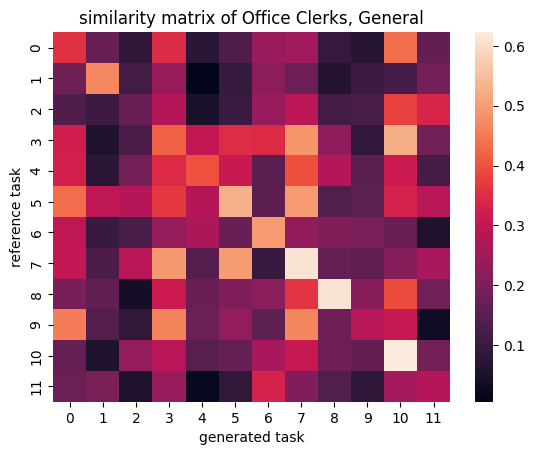

In [67]:
x = index
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")

In [6]:
mean = df["score"].mean()
np.save(folder_name + "/score.npy", mean)